# **CUSTOMER CHURN PREDICTION**

# **INTRODUCTION**

In today’s competitive financial landscape, retaining customers is critical for a financial institution’s profitability and growth. Customer churn, the phenomenon where customers stop using a company’s services, can lead to significant revenue loss. Predicting which customers are likely to churn can help businesses proactively implement strategies to retain them. By leveraging machine learning techniques, we can analyze customer behavior, identify patterns, and predict churn probabilities to inform decision-making.

# **PROBLEM STATEMENT**

Financial institutions face challenges in retaining customers due to competition and diverse customer preferences. The inability to predict and prevent customer churn results in lost revenue, increased customer acquisition costs, and diminished brand loyalty. The objective of this project is to develop a machine learning-based churn prediction model that identifies customers likely to leave the institution, enabling targeted retention efforts.

# **Objective:**

 Predict which customers are likely to leave the financial institution.

# **Business Impact**
Reducing churn has a direct financial impact because retaining existing customers is often more cost-effective than acquiring new ones. By identifying and addressing factors contributing to churn, the financial institution can improve:

1. Customer Lifetime Value (CLV)
2. Customer Retention Rate (CRR)
3. Overall profitability and competitiveness



# **1. LOADING THE NECESSARY LIBRARIES**



In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. LOADING THE DATASET**

I got the dataset from [Kaggle](https://www.kaggle.com/datasets/alaminbhuyan/customer-churn-prediction-datasets). The dataset has 21 columns.

In [107]:
customer_churn_df = pd.read_csv("Customer_Churn_Prediction.csv")

In [108]:
#reading the dataset
customer_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [109]:
customer_churn_df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# **3. DATA EXPLORATION AND DATA PREPOCESSING**

To understand the structure of the data

In [110]:
customer_churn_df.shape
#rows, columns

(7043, 21)

In [111]:
customer_churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162289,32.370865,64.761692
std,0.368742,24.559231,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [112]:
customer_churn_df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


There are no missing values

In [113]:
customer_churn_df.duplicated().sum()

0

There are no duplicate values

In [114]:
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [115]:
print(customer_churn_df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [116]:
#Converting DataFrame column elements from string to float using the following code line :

#data['TotalCharges'] = data['TotalCharges'].astype(float)

# Identify non-convertible values
non_convertible_values = customer_churn_df[customer_churn_df['TotalCharges'] == ' ']['TotalCharges']

# Print unique non-convertible values
print("Non-convertible values:", non_convertible_values.unique())

# Replace ' ' with NaN
customer_churn_df['TotalCharges'] = customer_churn_df['TotalCharges'].replace(' ', np.nan)

# Convert the column to float
customer_churn_df['TotalCharges'] =  customer_churn_df['TotalCharges'].astype(float)

# Drop rows with ' ' in 'TotalCharges'
customer_churn_df = customer_churn_df[customer_churn_df['TotalCharges'] != ' ']

# Convert the column to float
customer_churn_df['TotalCharges'] = customer_churn_df['TotalCharges'].astype(float)

customer_churn_df.drop(columns = ['customerID'], inplace = True)

Non-convertible values: [' ']


we will convert label encoding transformations

In [117]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

customer_churn_copy = customer_churn_df.copy(deep = True)
text_data_features = [i for i in list(customer_churn_df.columns) if i not in list(customer_churn_df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    customer_churn_copy[i] = le.fit_transform(customer_churn_copy[i])
    print(i,' : ',customer_churn_copy[i].unique(),' = ',le.inverse_transform(customer_churn_copy[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


I will generate a deep copy of the original dataset to ensure that modifications made during label encoding do not affect the original dataset. This deep copy will serve as a version with all features converted into numerical values, facilitating visualization and modeling.

Subsequently, I will recompute the descriptive statistics of the data to provide a comprehensive overview of the transformed dataset.

In [118]:
customer_churn_copy.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.504756,0.162289,0.483033,0.299588,32.370865,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985660,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368742,0.499748,0.458110,24.559231,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885007,0.885091,0.833755,0.491457,1.068104,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [119]:
customer_churn_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [120]:
customer_churn_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [121]:
#Check the distribution of the target variable (Churn) to identify class imbalance,
customer_churn_copy['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


The ratio of retained to churned customers is approximately:

No: 73%

Yes: 27%

# Imbalance Impact:

A dataset with a high imbalance may lead to biased models where the model predicts the majority class (in this case, "No" for retained) more often, potentially overlooking the minority class (churned).

For churn prediction, focusing on improving performance for the minority class (Yes) is critical for detecting and addressing churn risks accurately.

# Handling Imbalance:

To address this imbalance, techniques like:

1. SMOTE (Synthetic Minority Over-sampling Technique)
2. Class weights adjustment
3. Sampling (e.g., under-sampling majority class(0) or over-sampling minority class(1))
can be applied during data preprocessing.

#  VISUALIZE THE TARGET VARIABLE

Bar chart showing the class imbalance in the target variable(Churn)


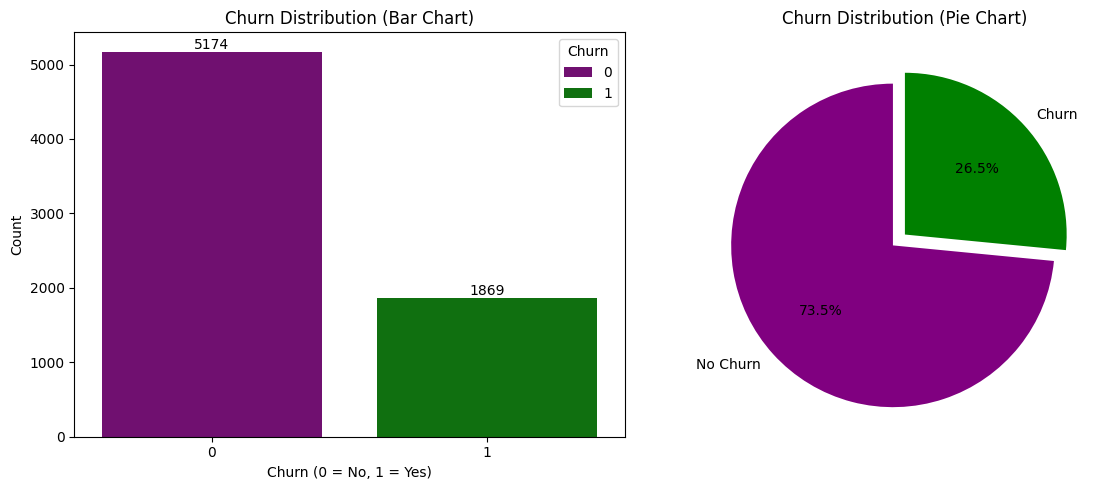

In [122]:
# Calculate the counts for each category in 'Churn'
churn_counts = customer_churn_copy['Churn'].value_counts()
labels = ['No Churn', 'Churn']

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
ax = sns.countplot(data=customer_churn_copy, x='Churn', hue='Churn', palette=['purple', 'green'], ax=axes[0])

# Add data labels on the bars
for container in ax.containers:
    ax.bar_label(container)

axes[0].set_title('Churn Distribution (Bar Chart)')
axes[0].set_xlabel('Churn (0 = No, 1 = Yes)')
axes[0].set_ylabel('Count')

# Pie chart
axes[1].pie(churn_counts, labels=labels, autopct='%1.1f%%',explode=(0.1, 0), startangle=90, colors=['purple', 'green'])
axes[1].set_title('Churn Distribution (Pie Chart)')

# Adjust layout
plt.tight_layout()
plt.show()


**Dividing features into Numerical and Categorical**

In the context of this analysis, features are classified as categorical if they have less than 6 unique elements; otherwise, they are considered numerical.

In [123]:
#Dividing features into Numerical and Categorical :

col = list(customer_churn_copy.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(customer_churn_copy[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


# VISUALIZING CATEGORICAL FEATURES AND THEIR IMPACT ON THE TARGET VARIABLE

For visualization purposes, I will exclude the target variable, "Churn," from the list of categorical features.

In [124]:
categorical_features.remove('Churn')

I classify them into three groups based on their values or column names. This categorization aids in organizing and analyzing the features more effectively, allowing for a structured exploration of their impact on the target variable.

In [125]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

# L1: Customer Information

This category encompasses attributes related to customer demographics and characteristics:

Gender

1.   **Gender**  
2.   **SeniorCitizen**
3.   **Partner**
4.   **Dependents**  


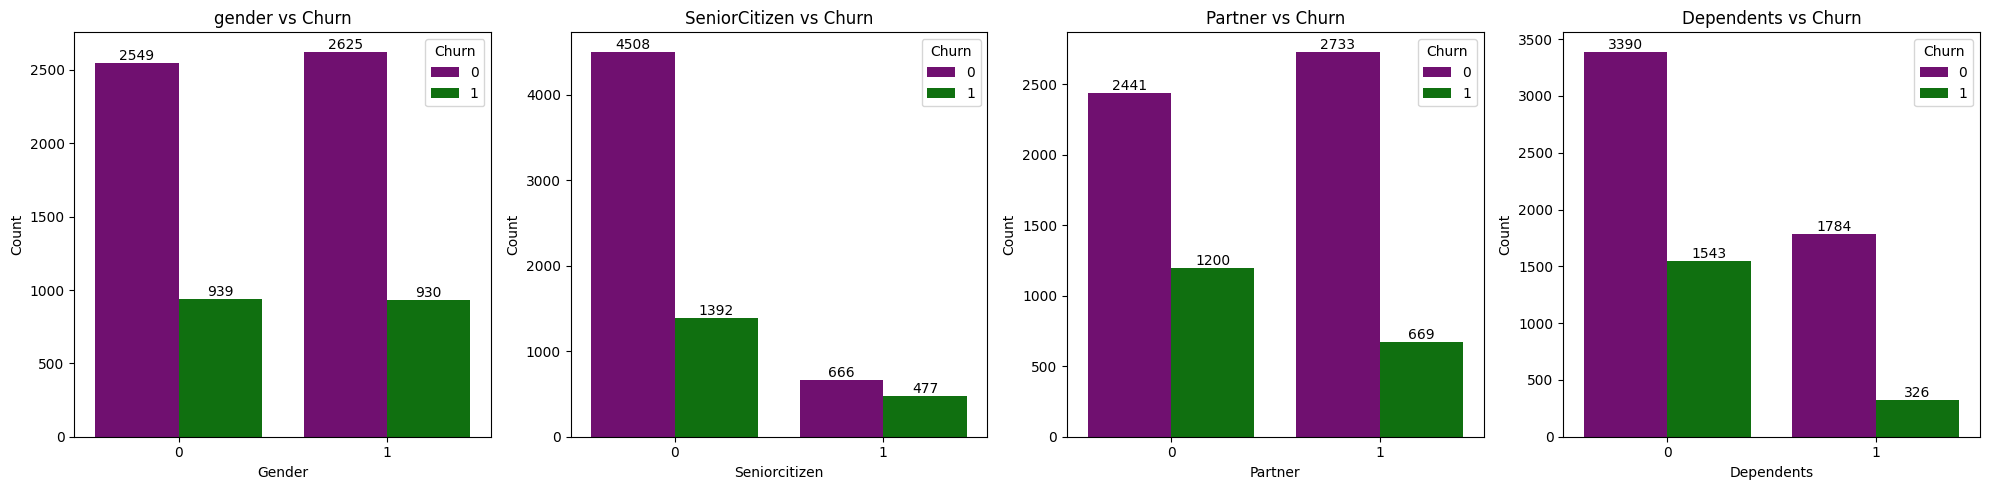

In [126]:
# Set up subplots
num_cols = len( l1)
fig, axs = plt.subplots(1, num_cols, figsize=(5 * num_cols, 5))

# Loop through the selected columns
for ax, feature in zip(axs, l1):
    sns.countplot(data=customer_churn_copy, x=feature, ax=ax, hue= 'Churn', palette=['purple', 'green'] )
    ax.set_title(f'{feature} vs Churn')
    ax.set_xlabel(feature.replace('_', ' ').title())
    ax.set_ylabel('Count')

    # Add data labels
    for container in ax.containers:
        ax.bar_label(container)

# Adjust layout
plt.tight_layout()
plt.show()


**1: Gender vs. Churn**
- The churn rate is almost identical between genders.
- Non-churn: Slightly higher count for "0" (male or female, depending on encoding).
- Churn: Numbers are nearly equal between genders.

**Conclusion:** Gender does not appear to have a significant influence on customer churn.

  **2: Senior Citizen vs. Churn**
- Non-Senior Citizens (category 0):A larger portion does not churn.
- Senior Citizens (category 1):Higher proportion of churn compared to non-senior citizens.

**Conclusion:** Senior citizens are more likely to churn compared to younger customers, possibly due to different service needs or costs.

**3: Partner vs. Churn**
- Customers without a partner (category 0) are more likely to churn than those with a partner (category 1).
***Conclusion:*** Having a partner might act as a stabilizing factor, possibly tied to household decisions or shared services.

**4: Dependents vs. Churn**
- Customers without dependents (category 0) have a higher churn rate compared to those with dependents (category 1).

# Conclusion:
- Similar to having a partner, dependents might reduce churn due to shared responsibilities or decision-making.


# L2: Customer-Enlisted Services
1. **PhoneService.**        
2. **MultipleLines**
3. **InternetService**
4. **StreamingTV**
5. **StreamingMovies**
6. **OnlineSecurity**
7. **OnlineBackup**
8. **DeviceProtection**
9. **TechSupport**

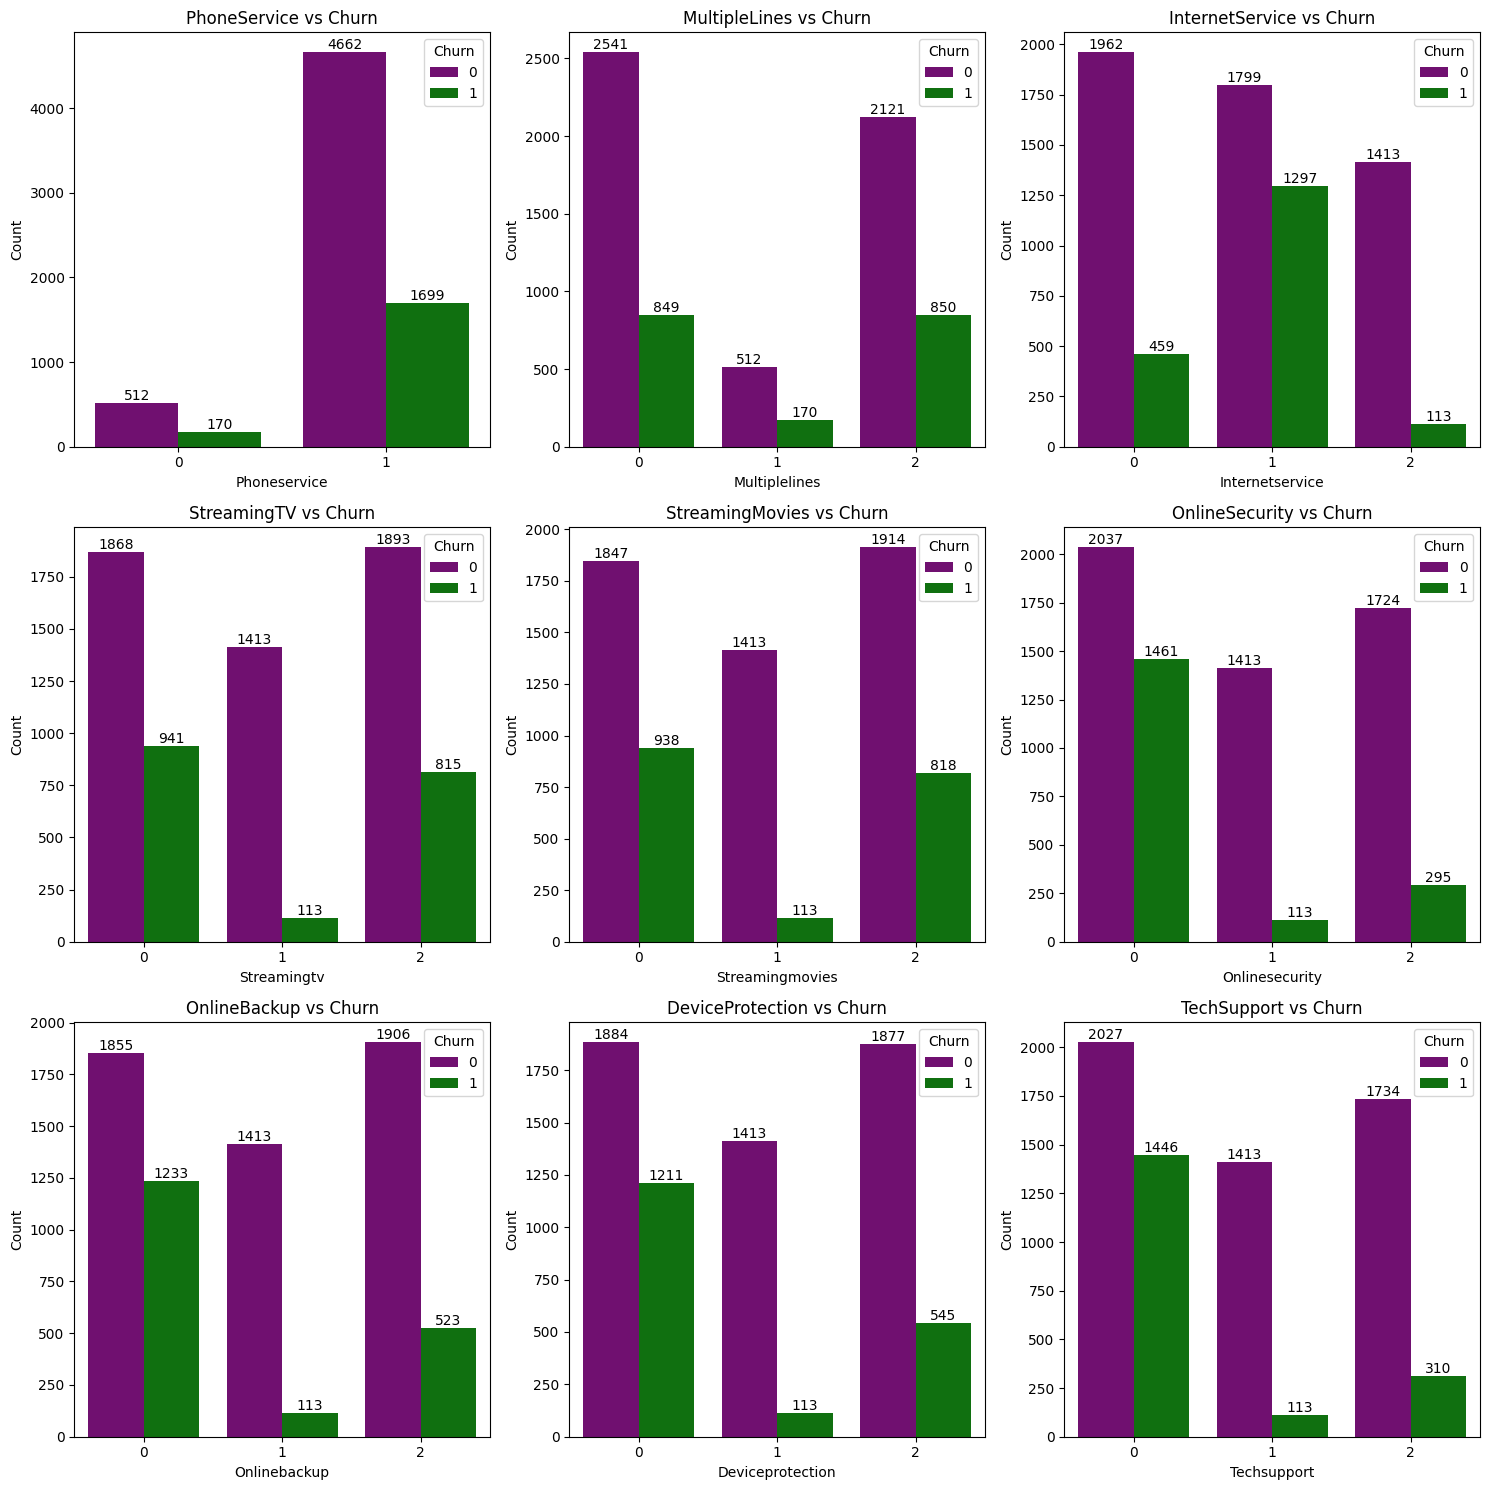

In [127]:
# 3x3 grid for subplots to accommodate 9 plots
rows, cols = 3, 3
fig, axs = plt.subplots(rows, cols, figsize=(15, 15))

# Flatten the 2D array of axes for easier iteration
axs = axs.flatten()

# Loop through the selected columns and corresponding axes
for ax, feature in zip(axs, l2):
    sns.countplot(data=customer_churn_copy, x=feature, ax=ax, hue='Churn', palette=['purple', 'green'])
    ax.set_title(f'{feature} vs Churn')
    ax.set_xlabel(feature.replace('_', ' ').title())
    ax.set_ylabel('Count')

    # Add data labels
    for container in ax.containers:
        ax.bar_label(container)

# Remove unused subplots (if any)
for ax in axs[len(l2):]:
    ax.remove()

# Adjust layout
plt.tight_layout()
plt.show()


# Observations:
***1. PhoneService vs. Churn: ***

Most customers (both churned and non-churned) have phone service.
Churn rate is relatively lower among customers without phone service.

**2. MultipleLines vs. Churn:**

Customers with "No multiple lines" (category 0) show lower churn compared to those with multiple lines.

**3. InternetService vs. Churn:**

A significant portion of churn occurs among customers using "Fiber optic" (category 1).
Customers without internet service (category 0) have the lowest churn rate.

**4. StreamingTV and StreamingMovies vs. Churn:**

Customers with streaming services (categories 1 and 2) have higher churn rates compared to those without these services.

**5. OnlineSecurity vs. Churn:**

Churn is much higher among customers who do not have online security (category 1).
Customers with online security (category 2) have significantly lower churn.

**6. OnlineBackup vs. Churn:**

Similar to online security, customers with online backup (category 2) have lower churn rates compared to those without it.

**7. DeviceProtection vs. Churn:**

Customers without device protection (category 1) show a higher churn rate.

**8. TechSupport vs. Churn:**

Lack of tech support (category 1) is associated with higher churn.
Customers with tech support (category 2) show the lowest churn rate.
# Conclusions:
- Services and churn are highly correlated. Customers without optional services like online security, online backup, device protection, or tech support tend to churn more.
- Fiber optic internet service seems to be associated with a higher churn rate, possibly indicating dissatisfaction or higher costs.
- Bundled services (e.g., streaming or multiple lines) could be related to higher churn, possibly due to additional costs or lack of satisfaction.

# L3: Payment Information

1. **Contract**
2. **PaperlessBilling**
3. **PaymentMethod**

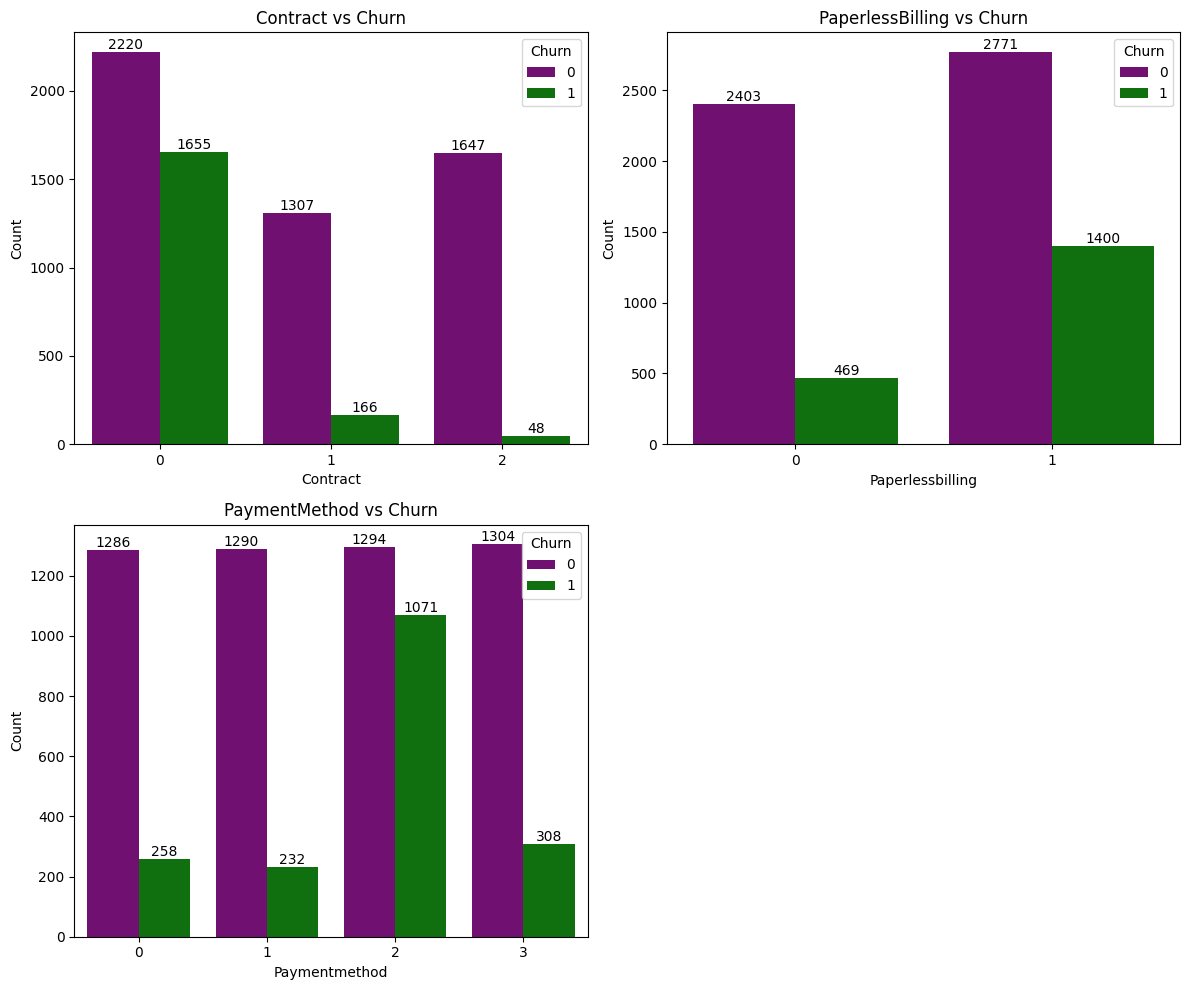

In [128]:
# Set up a 2x2 grid for subplots to accommodate 3 plots
rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 10))

# Flatten the 2D array of axes for easier iteration
axs = axs.flatten()

# Loop through the selected columns and corresponding axes
for ax, feature in zip(axs, l3):
    sns.countplot(data=customer_churn_copy, x=feature, ax=ax, hue='Churn', palette=['purple', 'green'])
    ax.set_title(f'{feature} vs Churn')
    ax.set_xlabel(feature.replace('_', ' ').title())
    ax.set_ylabel('Count')

    # Add data labels
    for container in ax.containers:
        ax.bar_label(container)

# Remove unused subplots (if any)
for ax in axs[len(l3):]:
    ax.remove()

# Adjust layout
plt.tight_layout()
plt.show()


**1. Contract Type:**
Month-to-month contracts have significantly higher churn compared to longer-term contracts (1-year or 2-year).
Very few customers churn on 1- or 2-year contracts, indicating that longer commitments are a key retention factor.

**Recommendation:** Encourage customers to switch to longer-term contracts through discounts or perks.

**2. Paperless Billing**:
Customers who use paperless billing are more likely to churn compared to those who don’t.
This may indicate that some customers using paperless billing feel disconnected or disengaged.

**Recommendation:** Improve the customer experience for paperless billing users by enhancing communication, reminders, and support services.

**3.  Payment Method:**
Electronic checks are associated with the highest churn compared to other payment methods.
Other methods like credit cards or bank transfers show lower churn rates, possibly due to ease of use and reliability.

**Recommendation:** Educate customers about alternative payment methods and incentivize switching to more stable payment options.



# VISUALIZING NUMERICAL FEATURES

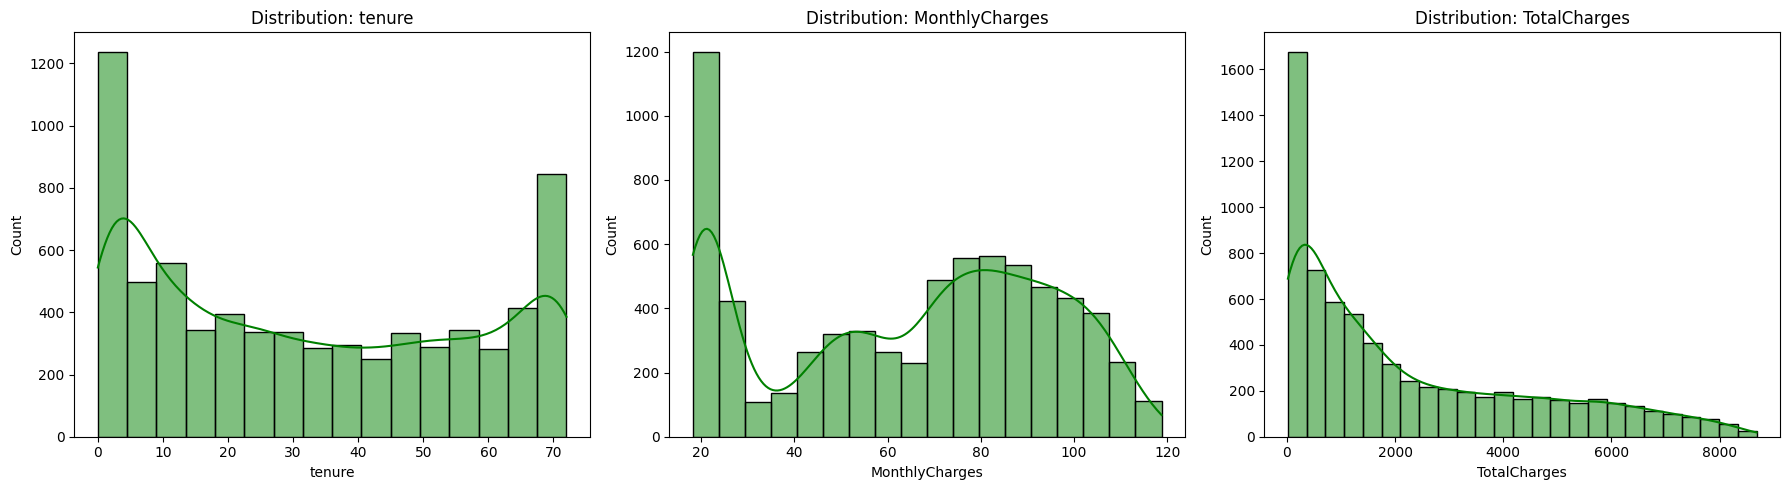

In [129]:
# Assuming numerical_features is already defined and contains 3 features
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Loop through numerical features
for i in range(len(numerical_features)):
    plt.subplot(1, 3, i + 1)
    sns.histplot(customer_churn_copy[numerical_features[i]], kde=True, color='green')
    title = f'Distribution: {numerical_features[i]}'
    plt.title(title)

# Adjust layout for spacing
plt.tight_layout()
plt.show()

**1.Tenure Distribution:**

Most customers have a low tenure (close to 0 months), which correlates with the high churn observed early in the customer lifecycle.
The distribution indicates a steady decline in customer counts as tenure increases, with a slight rise at long tenure periods (e.g., 60+ months).

**2. Monthly Charges Distribution:**

Customers are concentrated around lower monthly charges, but there’s a gradual spread toward higher charges.
Higher monthly charges may correlate with increased churn, as customers paying more might leave due to cost concerns.

**3. Total Charges Distribution:**

Total charges naturally skew toward lower values since this metric combines tenure and monthly charges. Long-tenure customers with high monthly charges contribute to higher total charges.

- Retention efforts should focus on retaining customers with low tenure.
- Customers with higher monthly charges might require more attention to reduce churn.


# Target Variable (Outcome) in Relation to Numerical Features

**1. MONTHLY CHARGES**

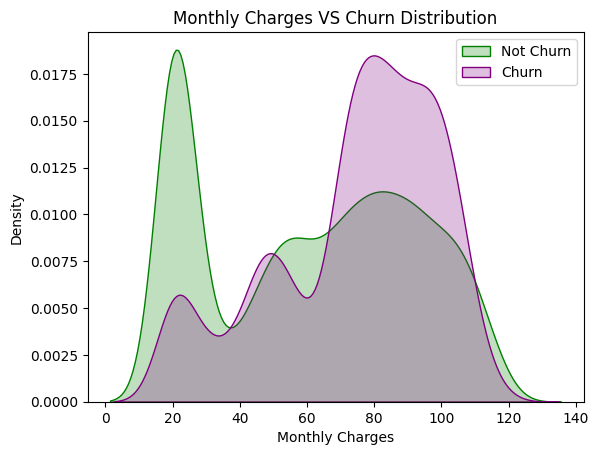

In [130]:
# Create KDE plot
ax = sns.kdeplot(customer_churn_copy.MonthlyCharges[(customer_churn_copy["Churn"] == 0) ],
                color="green", fill=True);
ax = sns.kdeplot(customer_churn_copy.MonthlyCharges[(customer_churn_copy["Churn"] == 1) ],
                ax=ax, color="purple", fill=True);

# Update legend
ax.legend(["Not Churn", "Churn"], loc='upper right');

# Set labels and title
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Monthly Charges VS Churn Distribution');

plt.show()


**Observation:**

Customers with higher Monthly Charges (e.g., above 70) are more likely to churn, as the purple curve dominates in this range.
Customers with lower Monthly Charges (e.g., below 40) are less likely to churn, as the green curve dominates this range.
There is significant overlap in the mid-range (40–70), showing mixed churn behavior.

**Conclusion:**

Higher Monthly Charges are a significant factor contributing to churn.
Low-charge plans seem to retain customers more effectively.


## **2. TOTAL CHARGES**

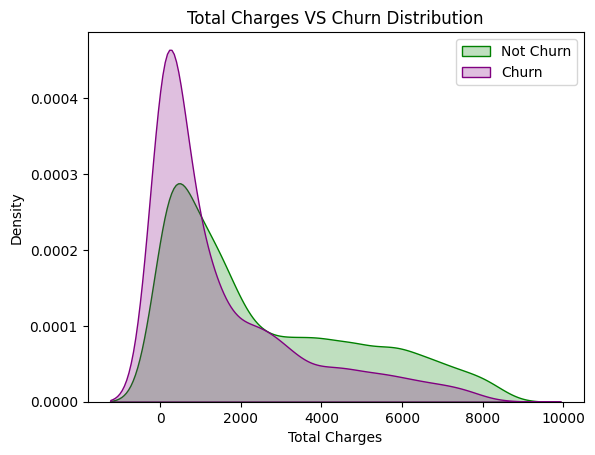

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create KDE plot
ax = sns.kdeplot(customer_churn_copy.TotalCharges[(customer_churn_copy["Churn"] == 0)], color="green", fill=True);
ax = sns.kdeplot(customer_churn_copy.TotalCharges[(customer_churn_copy["Churn"] == 1)], ax=ax, color="purple", fill=True);

# Update legend
ax.legend(["Not Churn", "Churn"], loc='upper right');

# Set labels and title
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Total Charges VS Churn Distribution');

plt.show()


**Observation:**

Customers with lower Total Charges are more likely to churn (represented by the purple density curve peaking at low values).
As Total Charges increase, the likelihood of churn decreases, as seen from the overlap of the green and purple curves at higher charge levels.
For customers with very high Total Charges (e.g., above 4000), churn is relatively rare.

**Conclusion:**

Low Total Charges may indicate newer customers who are more prone to churn.
Long-term customers with higher Total Charges are less likely to churn.


**3. TENURE**

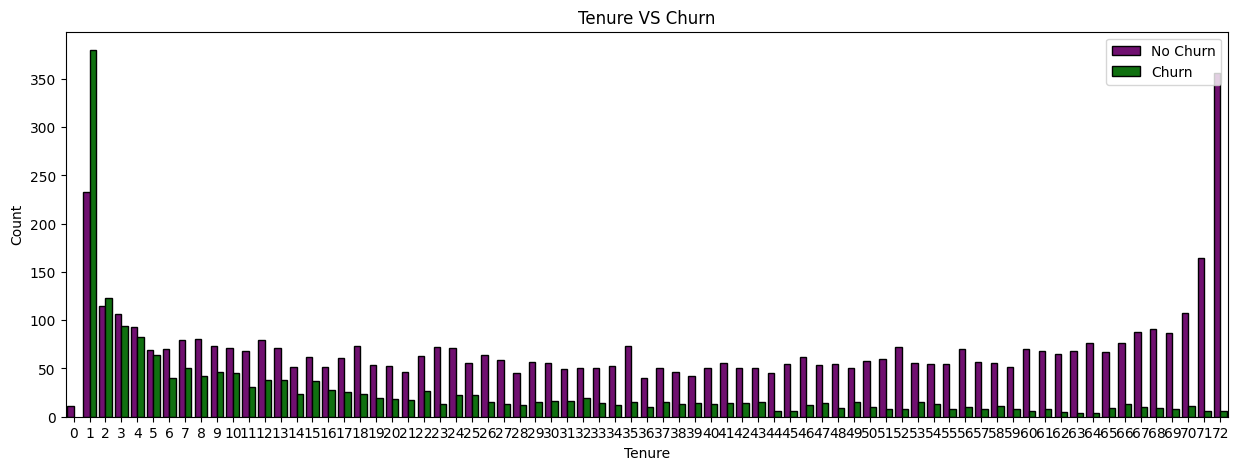

In [132]:
# Assuming df1 is your DataFrame and colors is defined
plt.figure(figsize=(15, 5))
sns.countplot(x='tenure', data=customer_churn_copy, hue='Churn', palette=['purple', 'green'], edgecolor='black')
plt.title('Tenure VS Churn')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(['No Churn', 'Churn'], loc='upper right')
plt.show()


**Observations:**

1. Tenure 0 (New Customers):

The highest churn occurs at this point. Many customers leave very early in their tenure.
However, a significant portion of new customers also stay, suggesting a critical evaluation period for customers.
2.  Low Tenure (1-10 months):

Churn decreases gradually as tenure increases.
This suggests customers who stay beyond the early months are less likely to churn.
3. Mid-to-Long Tenure:

Churn levels off and remains relatively low compared to "No Churn."
Most customers with long tenure tend to stay loyal, indicated by the taller purple bars.
4. End of Tenure (e.g., 72 months):

There is a noticeable spike in "No Churn," likely reflecting customers completing loyalty plans or contracts.

- Customer retention strategies should focus heavily on the first few months of
tenure to reduce churn.

- The stability in longer tenures suggests satisfied customers tend to remain loyal over time.

# **4. ADDRESSING CLASS IMBALANCE**

In [133]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer

In [134]:
cols = list(customer_churn_copy.columns)
cols.remove('Churn')

x = customer_churn_copy.loc[:,cols]
y = customer_churn_copy.loc[:,'Churn']

imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

over = SMOTE(sampling_strategy = 1)

x1,y1 = over.fit_resample(x,y)
print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y1))

Class distribution before SMOTE: Counter({0: 5174, 1: 1869})
Class distribution after SMOTE: Counter({0: 5174, 1: 5174})


# **5. TRAIN-TEST SPLIT**

In [135]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)

In [136]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape
#The shapes are represented as tuples (number of samples, number ofn features) for X and (number of samples,) for y.


((8278, 19), (8278,), (2070, 19), (2070,))

# ***Categorical Feature Selection  ***

In [137]:
# Creating a DataFrame from x_train
x_train_df = pd.DataFrame(x_train, columns=cols)

# Creating a DataFrame for y_train
y_train_df = pd.DataFrame({'Churn': y_train})

# Concatenate x_train_df and y_train_df along columns
x_train_test = pd.concat([x_train_df, y_train_df], axis=1)

In [138]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

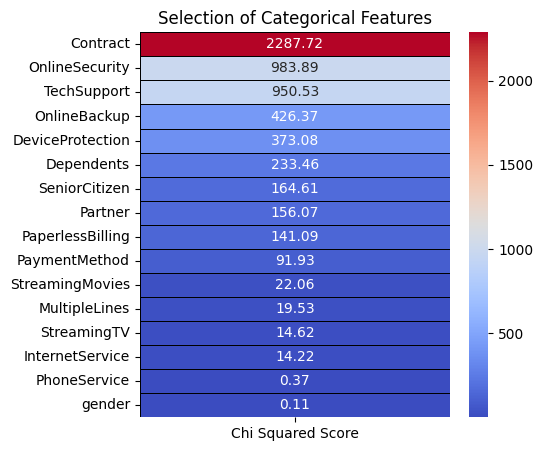

In [141]:
#Chi-Squared Test :

features = x_train_df.loc[:,categorical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True, cmap='coolwarm', linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

Less Important Features:

**StreamingMovies** (22.06), **MultipleLines** (19.53), **StreamingTV** (14.62), and **InternetService** (14.22) have lower scores.

**PhoneService** (0.37) and **gender** (0.11) have negligible scores, indicating little to no contribution to the prediction and should likely be dropped.


# **b. Numerical Feature Selection**

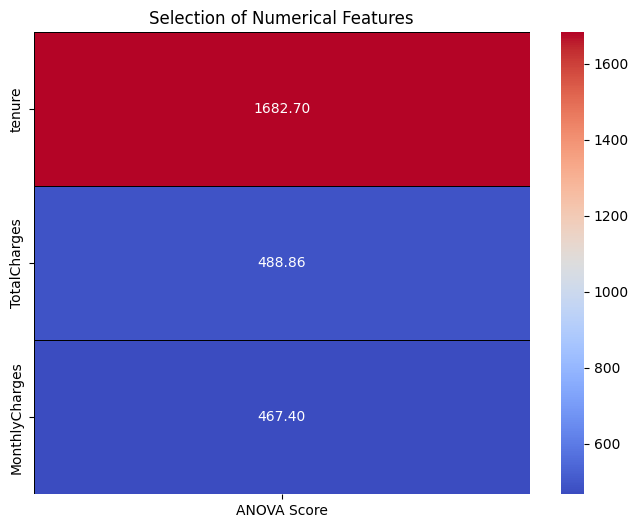

In [140]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

features = x_train_df[numerical_features]
target = y_train  # Ensure y is a 1D array

# Applying SelectKBest with ANOVA F-value
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

# Creating a DataFrame with ANOVA scores
featureScores = pd.DataFrame(data=fit.scores_, index=numerical_features, columns=['ANOVA Score'])

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(featureScores.sort_values(by='ANOVA Score', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')
plt.show()


all three features are important,so I'll keep all of them

In [142]:
x_train=x_train_df.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'])
x_test_df = pd.DataFrame(x_test, columns=cols)
x_test=x_test_df.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'])


# **6. Scaling**

In [143]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()  # Min-Max Scaling

columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

x_train[columns_to_scale] = mms.fit_transform(x_train[columns_to_scale])
x_test[columns_to_scale] = mms.transform(x_test[columns_to_scale])

# **7. TRAINING THE MODEL**

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold

In [150]:
def model(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)

    accuracy =classifier.score(x_test,y_test)
    print("Accuracy is :",accuracy)

    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)

    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))



def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    plt.figure(figsize=(4,3))
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')


    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))


# **7.1 RANDOM FOREST**

Accuracy is : 0.8164251207729468
Cross Validation Score :  89.97%
ROC_AUC Score :  81.56%
--------------------------------------------------------------------------------


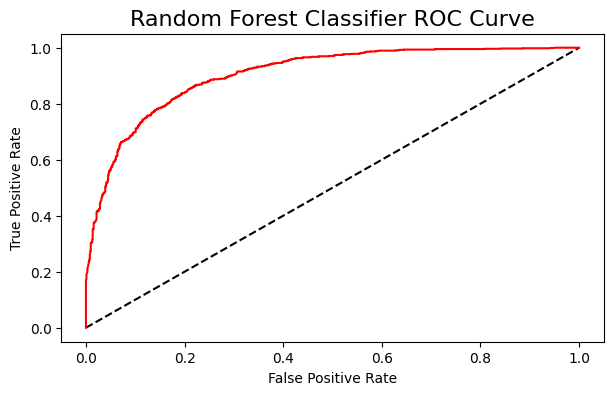

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.76      0.80      1021
           1       0.79      0.88      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



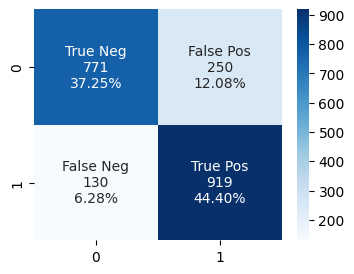

In [151]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

model(classifier_rf,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Random Forest Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_rf,x_test,y_test)

# **7.2 LOGISTIC REGRESSION**

Accuracy is : 0.7797101449275362
Cross Validation Score :  84.60%
ROC_AUC Score :  77.91%
--------------------------------------------------------------------------------


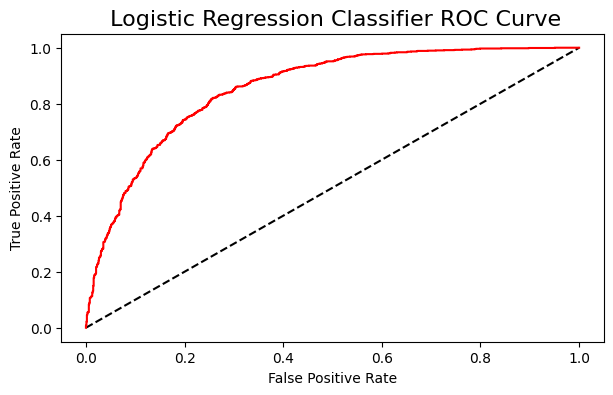

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1021
           1       0.76      0.82      0.79      1049

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



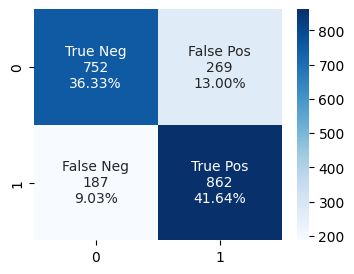

In [152]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()

model(classifier_lr,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_lr.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Logistic Regression Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_lr,x_test,y_test)

# **7.3 : DECISION TREE**

Accuracy is : 0.8120772946859903
Cross Validation Score :  86.33%
ROC_AUC Score :  81.17%
--------------------------------------------------------------------------------


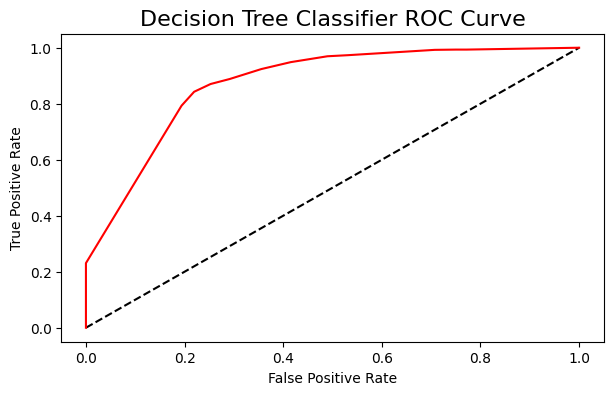

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1021
           1       0.80      0.84      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



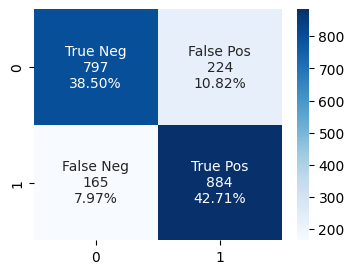

In [153]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

model(classifier_dt,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_dt.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Decision Tree Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_dt,x_test,y_test)

# **7.4 XGBOOST**

In [166]:
!pip install --upgrade xgboost


In [167]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
model(classifier_xgb,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_xgb.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Xgboost Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Xgboost Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_xgb,x_test,y_test)

Accuracy is : 0.8618357487922705


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBoost has given me errors. I've tried to upgrade but the issue is still the same.

# **RESULTS TABLE**

In [168]:
data = {
    'ML Algorithm': ['XGBClassifier', 'RandomForestClassifier', 'DecisionTreeClassifier', 'LogisticRegressionClassifier'],
    'Accuracy': [86.18, 81.64, 81.21, 77.97],
    'Cross Validation Score':[ "null", 89.97,  86.33, 84.60],
    'ROC AUC Score': ["null", 81.56,  81.17, 77.91],
    'F1 Score (Churn)': ["null", 83, 82, 79]
}

results_df = pd.DataFrame(data)
results_df

,ML Algorithm,Accuracy,Cross Validation Score,ROC AUC Score,F1 Score (Churn)
0,XGBClassifier,86.18,null,null,null
1,RandomForestClassifier,81.64,89.97,81.56,83
2,DecisionTreeClassifier,81.21,86.33,81.17,82
3,LogisticRegressionClassifier,77.97,84.6,77.91,79


# **8. FINAL MODEL SELECTION**

Random Forest was selected as the best-performing model for this task based on its balanced performance across key evaluation metrics. It achieved a high Cross Validation Score of 89.97%, indicating excellent generalizability to unseen data. Additionally, its F1 Score of 83 demonstrates strong performance in handling both precision and recall, which is crucial for imbalanced datasets like churn prediction

# **9. ACTIONABLE INSIGHTS AND STRATEGIES**

**1. Targeted Retention Based on Tenure**

- Early Tenure (0–3 months):
Offer personalized onboarding programs and regular check-ins.
Provide incentives like discounts or loyalty points to retain new customers.
Address early pain points using feedback from new customers.
- Mid-Tenure (4–12 months):
Communicate ongoing value through newsletters and feature updates.
Use predictive analytics to identify and re-engage at-risk customers.
Introduce milestone-based loyalty rewards (e.g., 6-month bonuses).
- Long-Term Tenure (12+ months):
Offer exclusive VIP perks, discounts, or premium features.
Foster a sense of belonging with community engagement initiatives.
***2. Address High Monthly Charges***

- Provide value-added services or tiered pricing models to justify high charges.
Offer discounts or tailored plans to reduce churn among cost-sensitive customers.
***3. Contract Strategy***

- Encourage customers to switch to longer-term contracts by offering discounts or upgraded service tiers.
- Focus on retaining customers with short-term contracts, as they are more likely to churn.
***4. Improvement Opportunities in Billing and Payments***

- Optimize the paperless billing experience by addressing friction points with better communication and support.
- Target electronic check users with campaigns to encourage more reliable payment methods.
***5. Service-Specific Improvements***

- Enhance the customer experience for fiber optic internet users.
- Highlight the value of additional services like online security, backup, and tech support to encourage adoption.
***6. Demographic-Based Strategies***

- Senior Citizens: Offer specialized plans and services tailored to their needs.
- Single Customers (without partners or dependents): Engage them with loyalty programs or personalized offers.
***7. Proactive Support and Feedback***

- Use exit surveys and churn data to identify common reasons for churn and address recurring issues.
- Proactively engage customers with tips, tutorials, and webinars to maximize product value.

**Key Takeaways**

- Early retention efforts are critical to reducing churn during the initial months of customer tenure.
- High-paying customers require additional value-added services or incentives to retain them.
- Longer-term contracts and proactive communication strategies significantly improve customer retention.
- Leveraging predictive analytics and segmentation analysis helps create targeted retention campaigns for different customer profiles.


# **9. BUSINESS IMPACT OF IMPLEMENTING INSIGHTS**

**1. Increased Customer Retention**  

- Reducing early churn (especially in the first 3 months) ensures a larger and more stable customer base, reducing customer acquisition costs over time.
- Improved retention among high-paying customers directly increases revenue and profitability, as retaining an existing customer is far less costly than acquiring a new one.

**2. Enhanced Customer Lifetime Value (CLV)**

- Encouraging longer tenure with loyalty rewards, personalized support, and tiered pricing models increases the average revenue per customer.
- Customers with longer contracts and high satisfaction levels are more likely to purchase additional services, further boosting CLV.

**3. Optimized Revenue Streams**

- Addressing pricing sensitivity through tiered pricing or tailored plans ensures that customers perceive value for their spending, minimizing revenue leakage due to churn.
- Promoting adoption of value-added services (e.g., online security, backups) diversifies revenue streams while increasing stickiness to the service.

**4. Reduced Churn Costs**

- By focusing on high-risk customer segments (e.g., short-tenure customers, senior citizens, or high-paying customers), the business can lower the operational costs associated with churn recovery efforts.

**5. Stronger Competitive Position**

- Offering personalized onboarding and proactive support improves the overall customer experience, helping the business stand out in a competitive market.
- Addressing specific needs of customer segments like senior citizens or single users strengthens brand loyalty in niche demographics.

**6. Improved Operational Efficiency**

- Predictive analytics and churn segmentation allow the business to allocate resources more effectively, focusing retention efforts where they are most needed.
- Transitioning customers to reliable payment methods reduces administrative overhead from failed payments.

**7. Higher Customer Satisfaction and Loyalty**

- Proactive communication and consistent demonstration of value create a positive brand image and stronger emotional connections with customers.
- A loyal customer base can drive positive word-of-mouth, reducing reliance on costly marketing campaigns.

**8. Revenue Growth and Stability**

- With reduced churn and higher customer satisfaction, the business experiences more predictable revenue streams.
- Growth opportunities arise from upselling or cross-selling additional services to long-term customers.

# **10. SAVING THE MODEL**


In [169]:
import joblib

# Save models
joblib.dump(classifier_rf, 'random_forest_model.pkl')
joblib.dump(classifier_lr, ' logistic_regression_model.pkl')
joblib.dump(classifier_dt, 'decision_tree_model.pkl')


print("Models saved successfully!")

Models saved successfully!
